# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [85]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [86]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"#"metric"
# set up lists to hold reponse info
cloudiness = []
city_new =[]
country  = []
date = []
humidity = []
lat=[]
lan=[]
speed=[]
maxtemp=[]

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")    
print("-----------------------------")  
i=1
j=1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lan.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])
        
        print("Processing Record "+str(i) + " of Set " + str(j) +" | " + city)
        city_new.append(city)
        
        i=i+1 
        if i == 50 :
            i=0
            j = j+1
    except KeyError:
        print("City not found. Skipping...")
print("-----------------------------")    
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | lincoln
Processing Record 5 of Set 1 | deputatskiy
Processing Record 6 of Set 1 | umarkot
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | sidney
Processing Record 10 of Set 1 | lasa
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | southbridge
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | gusinoye ozero
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of S

Processing Record 37 of Set 4 | charters towers
City not found. Skipping...
Processing Record 38 of Set 4 | el tambo
Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | warmbad
City not found. Skipping...
Processing Record 42 of Set 4 | cervignano del friuli
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | miri
Processing Record 45 of Set 4 | manaure
Processing Record 46 of Set 4 | menongue
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | magistralnyy
Processing Record 49 of Set 4 | saldanha
Processing Record 0 of Set 5 | sibolga
Processing Record 1 of Set 5 | toora-khem
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | kupang
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | the pas
Processing Record 9 of Set 5 | virginia beac

Processing Record 26 of Set 8 | tura
Processing Record 27 of Set 8 | ahuimanu
Processing Record 28 of Set 8 | chumikan
Processing Record 29 of Set 8 | auki
Processing Record 30 of Set 8 | alice springs
Processing Record 31 of Set 8 | salekhard
Processing Record 32 of Set 8 | sechura
Processing Record 33 of Set 8 | magugu
Processing Record 34 of Set 8 | aksarka
Processing Record 35 of Set 8 | bull savanna
Processing Record 36 of Set 8 | languyan
Processing Record 37 of Set 8 | salgotarjan
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | santa barbara
Processing Record 40 of Set 8 | sao filipe
Processing Record 41 of Set 8 | diebougou
Processing Record 42 of Set 8 | rio tercero
Processing Record 43 of Set 8 | liverpool
Processing Record 44 of Set 8 | vierzon
Processing Record 45 of Set 8 | bowen
Processing Record 46 of Set 8 | sao gabriel da cachoeira
Processing Record 47 of Set 8 | antalaha
Processing Record 48 of Set 8 | kolobrzeg
Processing Record 49 of Set 8 | a

Processing Record 12 of Set 12 | kisiwani
Processing Record 13 of Set 12 | tumut
Processing Record 14 of Set 12 | nishihara
City not found. Skipping...
Processing Record 15 of Set 12 | lerik
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [87]:

weather_dict = {
    "City": city_new,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lan,
    "Max Temp":maxtemp,
    "Wind Speed":speed    
}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.count()
#output_data_file = "../output_data/cities_RB.csv"
weather_data_df.to_csv("../"+ output_data_file)
       

In [67]:
weather_data_df.head()
weather_data_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

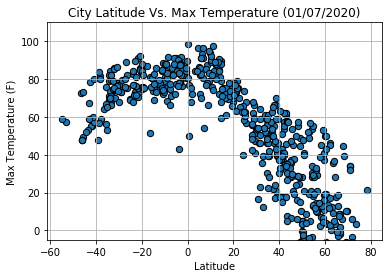

In [88]:
#weather_data_new= weather_data.loc[weather_data["Max Temp"] > 0]

date=time.strftime("%m/%d/%Y")

chart1= weather_data_df.plot(kind="scatter",x="Lat",y="Max Temp",grid=True,marker='o',s=40,edgecolors="black", linewidth=1)
chart1.set_xlabel("Latitude")
chart1.set_ylim(-5,110)
chart1.set_ylabel("Max Temperature (F)")
chart1.set_title("City Latitude Vs. Max Temperature (" +date + ")")
plt.savefig("../Images/LatvsTempplot.png")

In [ ]:
#In the above plot(Latitude Vs Max Temp) observed  closer to equator ( 0 Latitude) max temperature got captured

#### Latitude vs. Humidity Plot

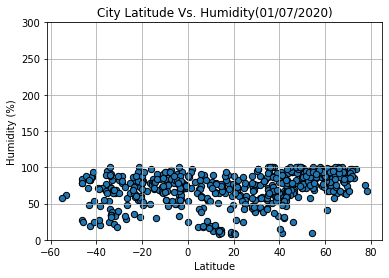

In [90]:
chart1= weather_data_df.plot(kind="scatter",x="Lat",y="Humidity",grid=True,marker='o',s=40,edgecolors="black", linewidth=1)
chart1.set_xlabel("Latitude")
chart1.set_ylabel("Humidity (%)")
chart1.set_ylim(0,300)
chart1.set_title("City Latitude Vs. Humidity(" + date + ")")
plt.savefig("../Images/LatvsHumplot.png")

In [ ]:
#In the above plot(Latitude Vs Humidity) for most of cities the humidity %  range is between 50 to 100

#### Latitude vs. Cloudiness Plot

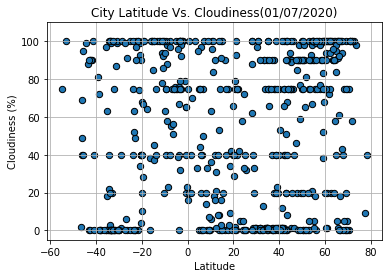

In [91]:
chart1= weather_data_df.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True,marker='o',s=40,edgecolors="black", linewidth=1)
chart1.set_xlabel("Latitude")
chart1.set_ylabel("Cloudiness (%)")
chart1.set_ylim(-5,110)
chart1.set_title("City Latitude Vs. Cloudiness(" + date + ")")
plt.savefig("../Images/LatvsClouplot.png")

In [ ]:
#In the above plot(Latitude Vs Cloudiness) the cloudiness in cities scattered between 0 to 100  

#### Latitude vs. Wind Speed Plot

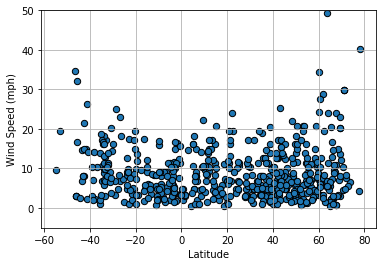

In [92]:
chart1= weather_data_df.plot(kind="scatter",x="Lat",y="Wind Speed",grid=True,marker='o',s=40,edgecolors="black", linewidth=1)
chart1.set_xlabel("Latitude")
chart1.set_ylabel("Wind Speed (mph)")
chart1.set_ylim(-5,50)

plt.savefig("../Images/LatvsWindspeedplot.png")

In [ ]:
#In the above plot(Latitude Vs windspeed) most of cities the windspeed is between 0 to 20 mph. Noticed some of cities closed to 
# to north and south poles have high windspeeds

## Linear Regression

In [93]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(x_value,y_value,pole,x_axis_title,y_axis_title,title,x_cor,y_cor):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot scatter plot
    plt.scatter(x_value,y_value)

# Plot regression line
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(x_cor,y_cor),fontsize=15,color="red")

# Label plot
    plt.xlabel(x_axis_title)
    plt.ylabel(y_axis_title)
    plt.title(title,fontsize=14, fontweight="bold")

# Print r square value
    print(f"The r-squard is: {rvalue}")
    output_file = "../Images/" + pole + x_axis_title + "Vs" + y_axis_title + "_le.png"
    plt.savefig(output_file)

# Show plot
    plt.show()
    

In [94]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[weather_data_df["Lat"] >= 0]
southern_df = weather_data_df.loc[weather_data_df["Lat"] < 0]
northern_df.head(10)
#southern_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,ribeira grande,40,PT,1578408217,88,38.52,-28.70,66.20,13.87
3,lincoln,75,GB,1578408072,87,53.23,-0.54,52.00,20.80
4,deputatskiy,100,RU,1578408218,92,69.30,139.90,-6.23,2.93
5,umarkot,32,PK,1578408218,76,25.37,69.74,57.00,10.67
6,butaritari,100,KI,1578408162,80,3.07,172.79,84.09,14.76
7,vila franca do campo,75,PT,1578408218,88,37.72,-25.43,66.20,11.41
8,sidney,20,US,1578407933,78,47.72,-104.16,15.80,8.05
9,lasa,75,CY,1578408218,71,34.92,32.53,57.20,8.05
10,chokurdakh,0,RU,1578408218,96,70.62,147.90,-22.72,4.45
12,southbridge,40,US,1578408218,68,42.08,-72.03,36.00,7.74


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squard is: -0.8514104014895526


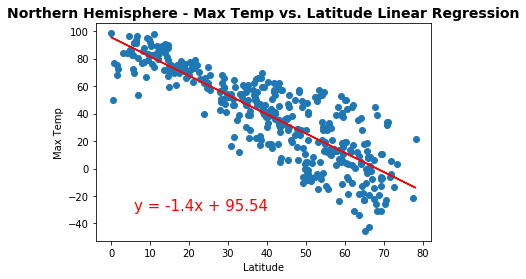

In [95]:
x_value = northern_df.iloc[:,5]
y_value = northern_df.iloc[:, 7]

linear_regression_plot(x_value,y_value,"north","Latitude","Max Temp","Northern Hemisphere - Max Temp vs. Latitude Linear Regression",6,-30)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squard is: 0.5927963794036634


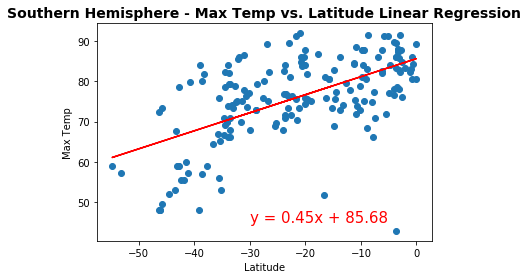

In [96]:
x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:, 7]

linear_regression_plot(x_value,y_value,"south","Latitude","Max Temp","Southern Hemisphere - Max Temp vs. Latitude Linear Regression",-30,45)


In [ ]:
In above two plots observed temparature is maximum closer to equator and the correlation is weak.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squard is: 0.4993848721549154


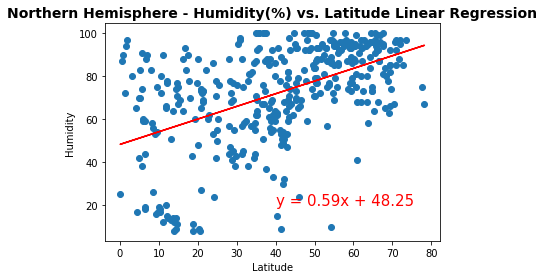

In [97]:
x_value = northern_df.iloc[:,5]
y_value = northern_df.iloc[:, 4]

linear_regression_plot(x_value,y_value,"north","Latitude","Humidity","Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression",40,20)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squard is: 0.202971604069236


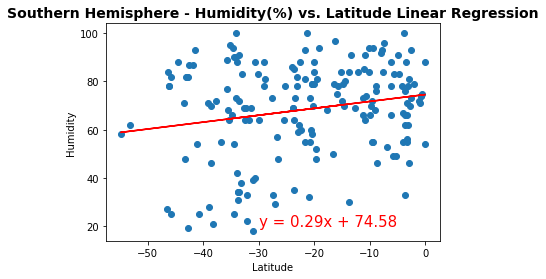

In [98]:
x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:, 4]

linear_regression_plot(x_value,y_value,"south","Latitude","Humidity","Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression",-30,20)



In [ ]:
The correlation between Latitude and Humidity is weak 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squard is: 0.2639821467352372


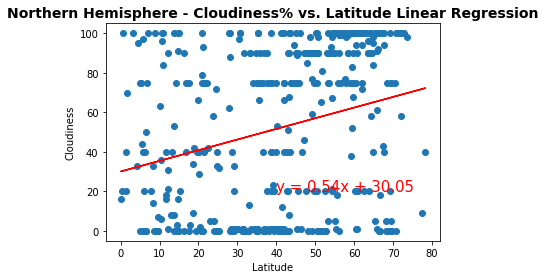

In [99]:
x_value = northern_df.iloc[:,5]
y_value= northern_df.iloc[:,1]

linear_regression_plot(x_value,y_value,"north","Latitude","Cloudiness","Northern Hemisphere - Cloudiness% vs. Latitude Linear Regression",40,20)



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squard is: 0.2922417220921859


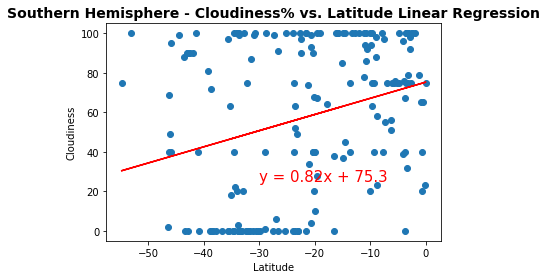

In [100]:
x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:,1]

linear_regression_plot(x_value,y_value,"south","Latitude","Cloudiness","Southern Hemisphere - Cloudiness% vs. Latitude Linear Regression",-30,25)


In [ ]:
#The correlation between Latitude and Cloudiness is very weak

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squard is: 0.12157284631326637


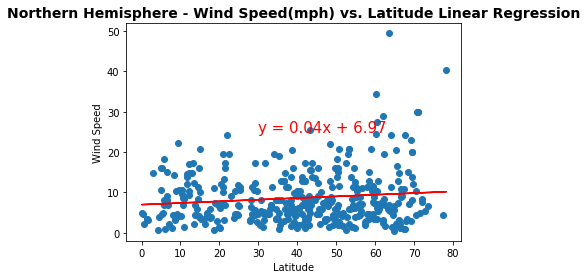

In [102]:
x_value = northern_df.iloc[:,5]
y_value = northern_df.iloc[:,8]

linear_regression_plot(x_value,y_value,"north","Latitude","Wind Speed","Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression",30,25)



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squard is: -0.29478054015584315


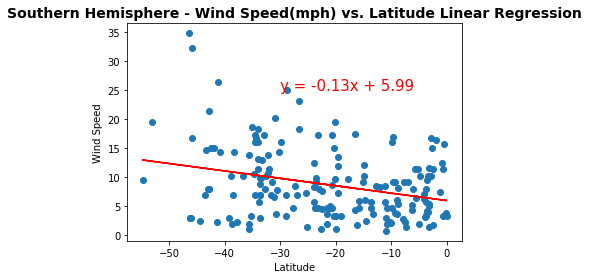

In [103]:
x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:,8]

linear_regression_plot(x_value,y_value,"south","Latitude","Wind Speed","Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression",-30,25)


In [ ]:
#The maximum wind speed is observed closer to equator and the relation between Latitude and windspeed is weak.